In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis import PandasAnalysis

In [2]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies

['../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/VH.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/VBSWH_mkW.root']

In [3]:
vbswh = PandasAnalysis(
    sig_root_files=babies[-1:],
    bkg_root_files=babies[:-1],
    ttree_name="tree",
    weight_columns=["xsec_sf"]
)

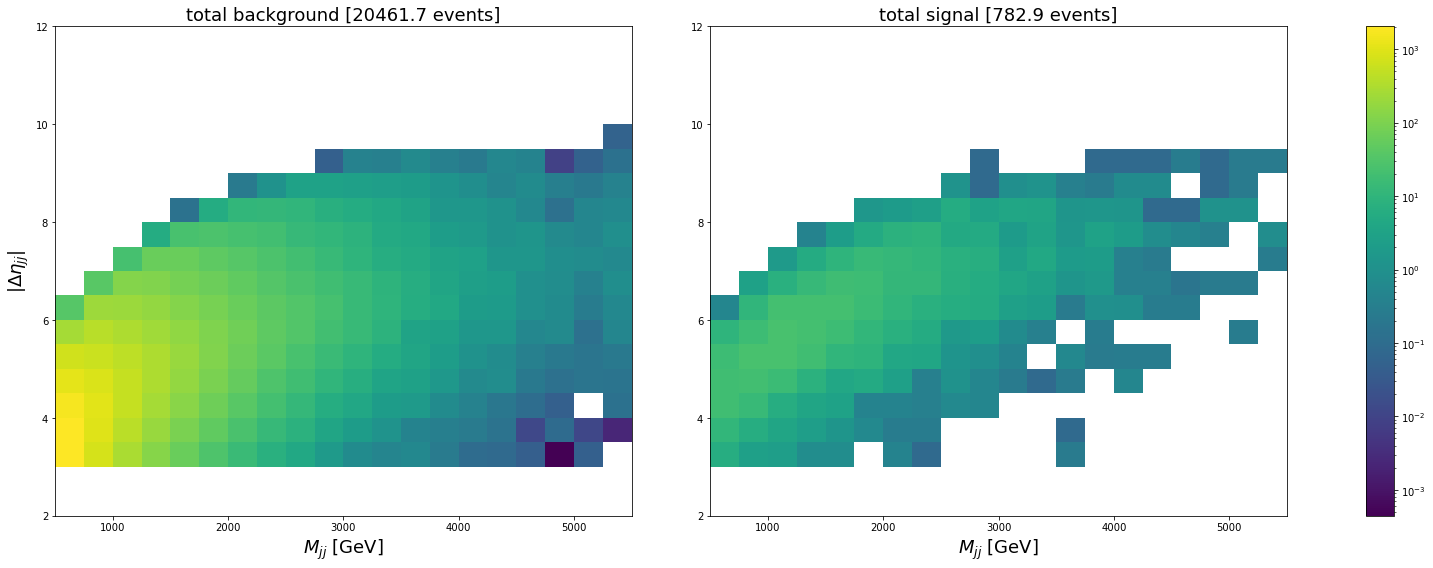

In [4]:
vbswh.plot_sig_vs_bkg_2D(
    "M_jj", "deta_jj", np.linspace(500, 5500, 21), np.linspace(2, 12, 21), 
    xabs=False, yabs=True, xlabel="$M_{jj}$ [GeV]", ylabel="$|\Delta\eta_{jj}|$", logz=True
);

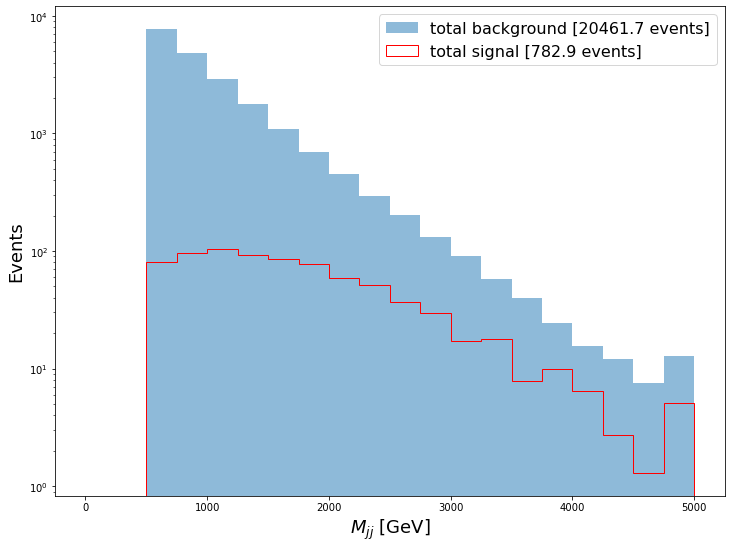

In [5]:
vbswh.plot_sig_vs_bkg("M_jj", np.linspace(0, 5000, 21), xlabel="$M_{jj}$ [GeV]", logy=True);

In [6]:
vbswh.fom_scan("M_jj", [1000, 1500, 2000, 2500], operator=">", base_selection="")

sel,sig,bkg,fom
M_jj > 1000,606.2571931406856,7807.433638864056,6.861242257397351
M_jj > 1500,408.0036117732525,3135.9298078669517,7.285860320717952
M_jj > 2000,244.28757148236036,1342.6949597947255,6.66672732988924
M_jj > 2500,134.3882504031062,594.5140784408313,5.511632193548561


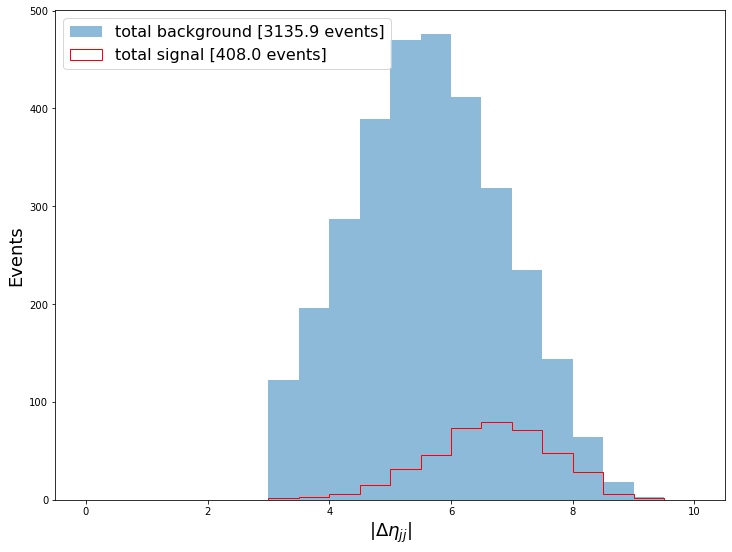

In [7]:
vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 10, 21), 
    selection="M_jj > 1500", 
    xlabel="$|\Delta\eta_{jj}|$",
    abs=True
);

In [8]:
vbswh.fom_scan(
    "deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", 
    base_selection="M_jj > 1500", abs=True
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 3.5,406.4746805354953,3013.8339850351413,7.40412659196664
M_jj > 1500 and abs(deta_jj) > 4,403.9216145053506,2817.2724246211665,7.609965210833752
M_jj > 1500 and abs(deta_jj) > 4.5,398.5441941767931,2529.888584235617,7.923659220784233
M_jj > 1500 and abs(deta_jj) > 5,383.99903203547,2140.676152327831,8.29955188239431
M_jj > 1500 and abs(deta_jj) > 5.5,352.8856238871813,1670.7514504359985,8.633324056640502
M_jj > 1500 and abs(deta_jj) > 6,307.70159711688757,1194.121125735604,8.90441842453251
M_jj > 1500 and abs(deta_jj) > 6.5,234.21319618821144,782.3968296396702,8.373322524575565
M_jj > 1500 and abs(deta_jj) > 7,154.3551746159792,464.23839235777467,7.163918996650522


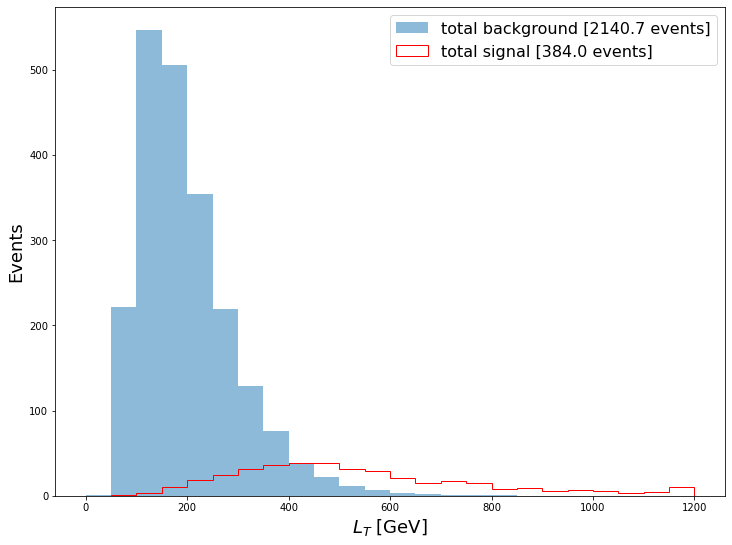

In [9]:
vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1200, 25), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", xlabel="$L_T$ [GeV]"
);

In [10]:
vbswh.fom_scan(
    "LT", [500, 600, 700, 800, 900, 1000, 1100, 1200], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
);

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and LT > 500,181.8056903705001,26.664457354313754,35.207979059426435
M_jj > 1500 and abs(deta_jj) > 5 and LT > 600,121.160968080163,8.163881554545924,42.40473828225971
M_jj > 1500 and abs(deta_jj) > 5 and LT > 700,85.35624697059393,2.708503510817536,51.86454949742935
M_jj > 1500 and abs(deta_jj) > 5 and LT > 800,53.69714563339949,1.0355438749975292,52.76755220685119
M_jj > 1500 and abs(deta_jj) > 5 and LT > 900,36.30406265705824,0.35214559866290074,61.17783386154996
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1000,23.54340899735689,0.14223076378402766,62.42701599031109
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1100,15.26379831135273,0.1132823509251466,45.35043865983977
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1200,8.629904136061668,0.07257327034312766,32.0344759995014


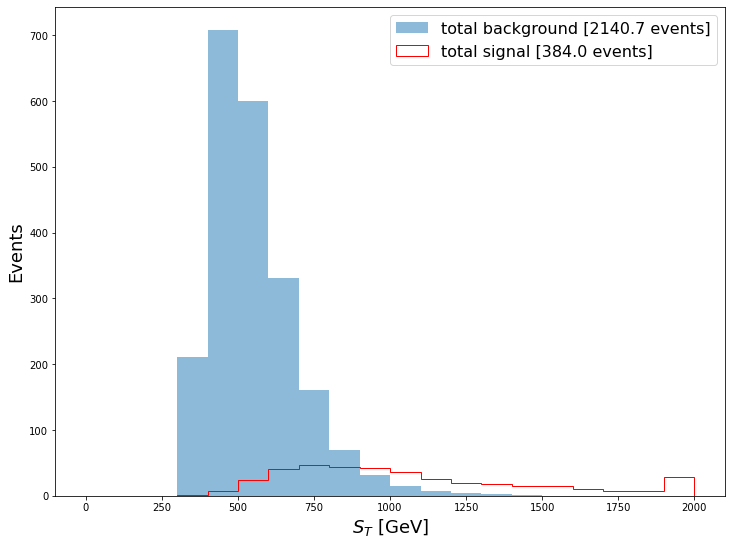

In [11]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(0, 2000, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", xlabel="$S_T$ [GeV]"
);
axes.set_ylim(ymin=0);

In [12]:
vbswh.fom_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1000,180.3400532901287,29.52404496652639,33.18977166552218
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1100,144.587591804564,14.23951472759768,38.316288076073846
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1200,119.085952937603,7.251621444662305,44.222467759174265
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,99.89154370129108,3.5175728468566376,53.26073734911308
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1400,82.3062400072813,1.4745768030588806,67.77960966739197
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1500,67.59755023568869,0.7101514102687361,80.21498013583737
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1600,53.33581764996052,0.32584626895550173,93.43564351458599
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1700,43.10148446261883,0.10561263847921509,132.62771327293396
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1800,36.052833557128906,0.1263041355268797,101.44499339999882
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1900,28.403829224407673

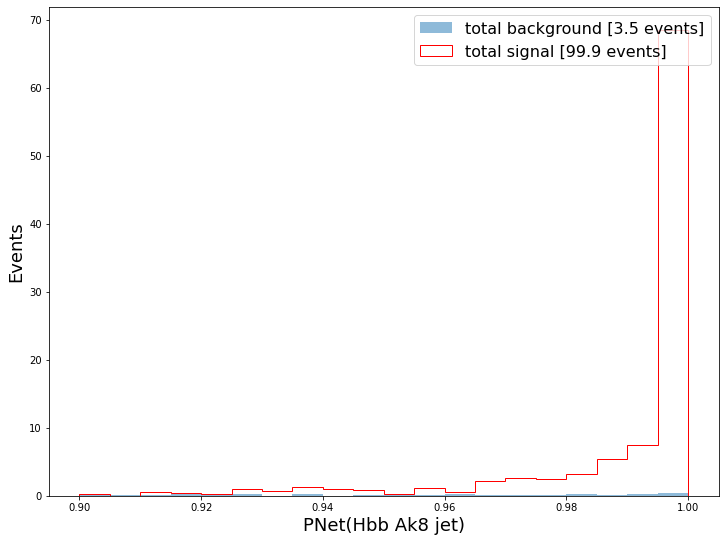

In [13]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0.9, 1.0, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300", 
    xlabel="PNet(Hbb Ak8 jet)"
);

In [14]:
vbswh.fom_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.91,99.63914547860622,3.1022757013815863,56.57047152522404
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.92,98.69953313469887,2.763894368104957,59.36826784214538
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.93,97.50752256810665,2.333545249490271,63.83075904327292
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,95.56383460015059,2.0208774188176903,67.22388109894445
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.95,93.76244597136974,1.936340034542809,67.38110298823806
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.96,92.39587324112654,1.7064112599873624,70.73115017062227
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.97,89.67493143677711,1.2841966491869243,79.13257300646097
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.98,84.56996849924326,1.

In [15]:
def lepton_charge_plot(vbswh, selection=None):
    fig, axes = plt.subplots(figsize=(12, 9))

    bkg_df = vbswh.bkg_df(selection=selection)
    sig_df = vbswh.sig_df(selection=selection)

    bkg_counts, _, _ = axes.hist(
        (bkg_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        alpha=0.5,
        weights=np.ones(len(bkg_df))/len(bkg_df),
        label=f"total background [{bkg_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, bkg_counts[0]+0.01, f"{bkg_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, bkg_counts[1]+0.01, f"{bkg_counts[1]:0.2f}", size=16, ha="center")

    sig_counts, _, _ = axes.hist(
        (sig_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        histtype="step",
        color="r",
        weights=np.ones(len(sig_df))/len(sig_df),
        label=f"total signal [{sig_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, sig_counts[0]+0.01, f"{sig_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, sig_counts[1]+0.01, f"{sig_counts[1]:0.2f}", size=16, ha="center")

    axes.set_ylabel("Events/Total", size=18)
    axes.set_xticks([0.5, 1.5]);
    axes.set_xticklabels(["$\ell^{+}$", "$\ell^{-}$"], size=18);

    axes.legend(fontsize=16);

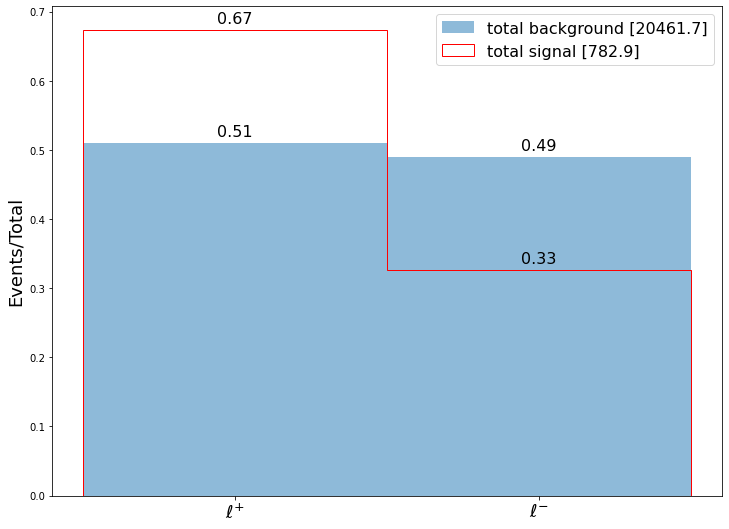

In [16]:
lepton_charge_plot(vbswh)

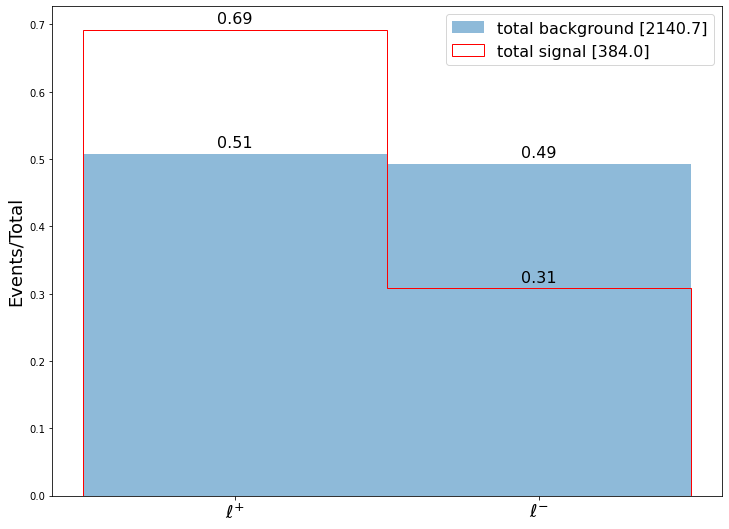

In [17]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5")

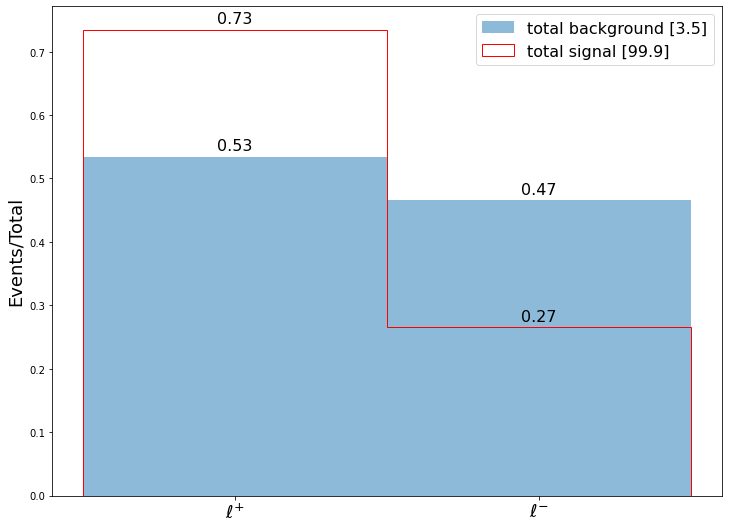

In [18]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300")